In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': 'tharindarajapaksha',
    'key': '1a0f7b265e98ba4a1fef6af7d878d22e'
}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c quora-question-pairs --force

 80% 17.0M/21.2M [00:00<00:00, 37.9MB/s]
100% 21.2M/21.2M [00:00<00:00, 39.2MB/s]
100% 4.95M/4.95M [00:00<00:00, 44.2MB/s]

100% 114M/114M [00:01<00:00, 117MB/s] 

 96% 167M/173M [00:01<00:00, 119MB/s]
100% 173M/173M [00:01<00:00, 102MB/s]


In [3]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [4]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [5]:
# download glove dataset files from the internet
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-08 18:07:41--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-08 18:07:41--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-08 18:07:41--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [6]:
# extract the downloaded zip file
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [7]:
# list files and directories
!ls

glove.6B.100d.txt  glove.6B.50d.txt  sample_submission.csv.zip	train.csv
glove.6B.200d.txt  glove.6B.zip      test.csv			train.csv.zip
glove.6B.300d.txt  sample_data	     test.csv.zip


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [9]:
train_data = pd.read_csv('train.csv')

In [10]:
test_data = pd.read_csv('test.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
tt = pd.read_csv('test.csv')
print(tt.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3563475, 3)


In [12]:
tt['question1'].isnull().sum()

4

In [13]:
tt['question2'].isnull().sum()

6

In [14]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [15]:
train_data.shape

(404290, 6)

In [16]:
test_data.shape

(3563475, 3)

In [17]:
test_data.fillna(value='', inplace=True)

In [18]:
test_data[['question1', 'question2']].isnull().sum()

question1    0
question2    0
dtype: int64

In [19]:
import re


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", 'will not', phrase)
    phrase = re.sub(r"can\'t", 'can not', phrase)

    # general
    phrase = re.sub(r"n\'t", ' not', phrase)
    phrase = re.sub(r"\'re", ' are', phrase)
    phrase = re.sub(r"\'s", ' is', phrase)
    phrase = re.sub(r"\'d", ' would', phrase)
    phrase = re.sub(r"\'ll", ' will', phrase)
    phrase = re.sub(r"\'t", ' not', phrase)
    phrase = re.sub(r"\'ve", ' have', phrase)
    phrase = re.sub(r"\'m", ' am', phrase)
    return phrase

In [20]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', str(data))
    return cleantext

In [21]:
def stripunc(data):
    return re.sub('[^A-Za-z]+', '', str(data), flags=re.MULTILINE | re.DOTALL)

In [22]:
import nltk

nltk.download()

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

from tqdm import tqdm

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

In [23]:
def compute(sent):
    sent = decontracted(str(sent))
    sent = striphtml(sent)
    sent = stripunc(sent)

    words = word_tokenize(str(sent.lower()))

    sent1 = ' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j) != 1))
    sent2 = ' '.join(str(j) for j in words if j not in stop_words and (len(j) != 1))
    return sent1, sent2

In [24]:
clean_stemmed_q1 = []
clean_stemmed_q2 = []
clean_q1 = []
clean_q2 = []
combined_stemmed_text = []
for _, row in tqdm(train_data.iterrows()):
    csq1, cq1 = compute(row['question1'])
    csq2, cq2 = compute(row['question2'])
    clean_stemmed_q1.append(csq1)
    clean_q1.append(cq1)
    clean_stemmed_q2.append(csq2)
    clean_q2.append(cq2)
    combined_stemmed_text.append(csq1 + " " + csq2)

404290it [04:31, 1487.72it/s]


In [25]:
clean_stemmed_q1_t = []
clean_stemmed_q2_t = []
clean_q1_t = []
clean_q2_t = []
combined_stemmed_text_t = []
for _, row in tqdm(test_data.iterrows()):
    csq1_t, cq1_t = compute(row['question1'])
    csq2_t, cq2_t = compute(row['question2'])
    clean_stemmed_q1_t.append(csq1_t)
    clean_q1_t.append(cq1_t)
    clean_stemmed_q2_t.append(csq2_t)
    clean_q2_t.append(cq2_t)
    combined_stemmed_text_t.append(csq1_t + " " + csq2_t)

3563475it [39:41, 1496.26it/s]


In [26]:
test_data['question1'][test_data['question2'].isnull()]

Series([], Name: question1, dtype: object)

In [27]:
test_data['question2'][test_data['question1'].isnull()]

Series([], Name: question2, dtype: object)

In [28]:
print(len(clean_stemmed_q1))
print(len(clean_stemmed_q2))
print(len(clean_q1))
print(len(clean_q2))
print(len(combined_stemmed_text))

404290
404290
404290
404290
404290


In [29]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [30]:
train_data['clean_stemmed_q1'] = clean_stemmed_q1
train_data['clean_stemmed_q2'] = clean_stemmed_q2
train_data['clean_q1'] = clean_q1
train_data['clean_q2'] = clean_q2
train_data['combined_stemmed_text'] = combined_stemmed_text

In [31]:
test_data['clean_stemmed_q1_t'] = clean_stemmed_q1_t
test_data['clean_stemmed_q2_t'] = clean_stemmed_q2_t
test_data['clean_q1_t'] = clean_q1_t
test_data['clean_q2_t'] = clean_q2_t
test_data['combined_stemmed_text_t'] = combined_stemmed_text_t

In [32]:
train_data.tail()

,id,qid1,qid2,question1,question2,is_duplicate,clean_stemmed_q1,clean_stemmed_q2,clean_q1,clean_q2,combined_stemmed_text
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,howmanykeywordsarethereintheracketprogrammingl...,howmanykeywordsarethereinperlprogramminglangua...,howmanykeywordsarethereintheracketprogrammingl...,howmanykeywordsarethereinperlprogramminglangua...,howmanykeywordsarethereintheracketprogrammingl...
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,doyoubelievethereislifeafterdeath,isittruethatthereislifeafterdeath,doyoubelievethereislifeafterdeath,isittruethatthereislifeafterdeath,doyoubelievethereislifeafterdeath isittruethat...
404287,404287,537928,537929,What is one coin?,What's this coin?,0,whatisonecoin,whatisthiscoin,whatisonecoin,whatisthiscoin,whatisonecoin whatisthiscoin
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,whatistheapproxannualcostoflivingwhilestudying...,iamhavinglittlehairfallproblembutiwanttousehai...,whatistheapproxannualcostoflivingwhilestudying...,iamhavinglittlehairfallproblembutiwanttousehai...,whatistheapproxannualcostoflivingwhilestudying...
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0,whatisliketohavesexwithcousin,whatisitliketohavesexwithyourcousin,whatisliketohavesexwithcousin,whatisitliketohavesexwithyourcousin,whatisliketohavesexwithcousin whatisitliketoha...


In [33]:
test_data.head()

,test_id,question1,question2,clean_stemmed_q1_t,clean_stemmed_q2_t,clean_q1_t,clean_q2_t,combined_stemmed_text_t
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,howdoesthesurfaceprohimselfcomparewithipadpro,whydidmicrosoftchoosecoremandnotcoreihomesurfa...,howdoesthesurfaceprohimselfcomparewithipadpro,whydidmicrosoftchoosecoremandnotcoreihomesurfa...,howdoesthesurfaceprohimselfcomparewithipadpro ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,shouldihaveahairtransplantatagehowmuchwoulditcost,howmuchcostdoeshairtransplantrequir,shouldihaveahairtransplantatagehowmuchwoulditcost,howmuchcostdoeshairtransplantrequire,shouldihaveahairtransplantatagehowmuchwoulditc...
2,2,What but is the best way to send money from Ch...,What you send money to China?,whatbutisthebestwaytosendmoneyfromchinatotheus,whatyousendmoneytochina,whatbutisthebestwaytosendmoneyfromchinatotheus,whatyousendmoneytochina,whatbutisthebestwaytosendmoneyfromchinatotheus...
3,3,Which food not emulsifiers?,What foods fibre?,whichfoodnotemulsifi,whatfoodsfibr,whichfoodnotemulsifiers,whatfoodsfibre,whichfoodnotemulsifi whatfoodsfibr
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,howaberystwythstartread,howtheircanistartread,howaberystwythstartreading,howtheircanistartreading,howaberystwythstartread howtheircanistartread


In [34]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,clean_stemmed_q1,clean_stemmed_q2,clean_q1,clean_q2,combined_stemmed_text
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,whatisthestepbystepguidetoinvestinsharemarketi...,whatisthestepbystepguidetoinvestinsharemarket,whatisthestepbystepguidetoinvestinsharemarketi...,whatisthestepbystepguidetoinvestinsharemarket,whatisthestepbystepguidetoinvestinsharemarketi...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,whatisthestoryofkohinoorkohinoordiamond,whatwouldhappeniftheindiangovernmentstoletheko...,whatisthestoryofkohinoorkohinoordiamond,whatwouldhappeniftheindiangovernmentstoletheko...,whatisthestoryofkohinoorkohinoordiamond whatwo...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,howcaniincreasethespeedofmyinternetconnectionw...,howcaninternetspeedbeincreasedbyhackingthroughdn,howcaniincreasethespeedofmyinternetconnectionw...,howcaninternetspeedbeincreasedbyhackingthroughdns,howcaniincreasethespeedofmyinternetconnectionw...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,whyamimentallyverylonelyhowcanisolveit,findtheremainderwhenmathmathisdividedbi,whyamimentallyverylonelyhowcanisolveit,findtheremainderwhenmathmathisdividedby,whyamimentallyverylonelyhowcanisolveit findthe...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,whichonedissolveinwaterquiklysugarsaltmethanea...,whichfishwouldsurviveinsaltwat,whichonedissolveinwaterquiklysugarsaltmethanea...,whichfishwouldsurviveinsaltwater,whichonedissolveinwaterquiklysugarsaltmethanea...


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_temp, X_test, y_temp, y_test = train_test_split(train_data[['clean_q1', 'clean_q2']],
                                                  train_data['is_duplicate'],
                                                  test_size=0.2,
                                                  random_state=42)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_temp,
                                                  y_temp,
                                                  test_size=0.2,
                                                  random_state=42)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(258745, 2)
(258745,)
(64687, 2)
(64687,)
(80858, 2)
(80858,)


In [39]:
X_train.head()

,clean_q1,clean_q2
230032,isscamauditcomalegitwebsite,isasoscomalegitwebsiteorascam
248995,whydoesindiaabusebangladeshwhyindiawantstocrip...,whydochinaindiabangladeshandpakistanhaveextrem...
150546,whymsdhonileftcaptaincythoughhewasasuccessfulc...,whymsdhonihasquitthecaptaincyfromlimitedovers
45388,icomposesongscanthesongshelpmetodoproductionel...,iamtryingveryhardtorecollectasongfromanindiant...
264347,whatdofinancepeoplethinkofzerohedgecom,howdoilearnquantitativefinance


In [40]:
X_train['text'] = X_train[['clean_q1', 'clean_q2']].apply(lambda x: str(x[0]) + ' ' + str(x[1]), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
import tensorflow as tf

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Embedding, LSTM

In [43]:
t = Tokenizer()
t.fit_on_texts(X_train['text'].values)

In [44]:
X_train['clean_q1'] = X_train['clean_q1'].astype(str)
X_train['clean_q2'] = X_train['clean_q2'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
X_val['clean_q1'] = X_val['clean_q1'].astype(str)
X_val['clean_q2'] = X_val['clean_q2'].astype(str)

X_test['clean_q1'] = X_test['clean_q1'].astype(str)
X_test['clean_q2'] = X_test['clean_q2'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
train_q1_seq = t.texts_to_sequences(X_train['clean_q1'].values)

In [47]:
train_q2_seq = t.texts_to_sequences(X_train['clean_q2'].values)
val_q1_seq = t.texts_to_sequences(X_val['clean_q1'].values)
val_q2_seq = t.texts_to_sequences(X_val['clean_q2'].values)
test_q1_seq = t.texts_to_sequences(X_test['clean_q1'].values)
test_q2_seq = t.texts_to_sequences(X_test['clean_q2'].values)

In [48]:
len_vec = [len(sent_vec) for sent_vec in train_q1_seq]

In [49]:
np.max(len_vec)

1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


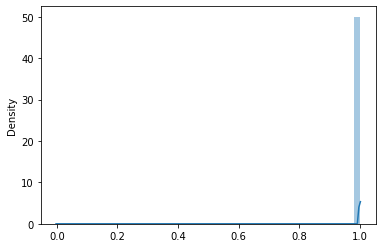

In [50]:
sns.distplot(len_vec)

In [51]:
len_vec = [len(sent_vec) for sent_vec in train_q2_seq]

In [52]:
np.max(len_vec)

1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


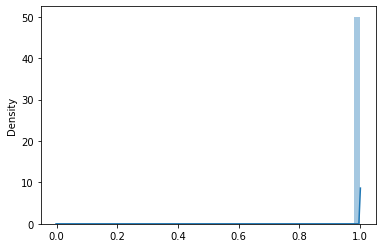

In [53]:
sns.distplot(len_vec)

In [54]:
max_len = 30

In [55]:
train_q1_seq = pad_sequences(train_q1_seq, maxlen=max_len, padding='post')

In [56]:
train_q2_seq = pad_sequences(train_q2_seq, maxlen=max_len, padding='post')
val_q1_seq = pad_sequences(val_q1_seq, maxlen=max_len, padding='post')
val_q2_seq = pad_sequences(val_q2_seq, maxlen=max_len, padding='post')
test_q1_seq = pad_sequences(test_q1_seq, maxlen=max_len, padding='post')
test_q2_seq = pad_sequences(test_q2_seq, maxlen=max_len, padding='post')

In [57]:
print(len(train_q1_seq[0]))
print(len(train_q2_seq[0]))
print(len(val_q1_seq[0]))
print(len(val_q2_seq[0]))
print(len(test_q1_seq[0]))
print(len(test_q1_seq[0]))

30
30
30
30
30
30


In [58]:
!pip install joblib

In [59]:
embeddings_index = {}
f = open('glove.6B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [60]:
len(embeddings_index.keys())

400000

In [61]:
len(embeddings_index['apple'])

300

In [63]:
not_present_list = []
embedding_vector = None
vocab_size = len(t.word_index) + 1
print('Loaded %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, len(embeddings_index['no'])))
for word, i in t.word_index.items():
    if word in embeddings_index.keys():
        embedding_vector = embeddings_index.get(word)
    else:
        not_present_list.append(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.zeros(300)

Loaded 400000 word vectors.


In [64]:
embedding_matrix.shape

(371654, 300)

In [65]:
len(t.word_index)

371653

In [66]:
from keras.models import Model

from keras.layers.core import Lambda
from keras.layers import Input, Dense, Flatten, Concatenate, Multiply, Dropout, Subtract

In [67]:
from keras import backend as K


def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)


def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return shape1[0], 1

In [68]:
from sklearn.metrics import roc_auc_score


def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [69]:
input_1 = Input(shape=(train_q1_seq.shape[1],))
input_2 = Input(shape=(train_q2_seq.shape[1],))

common_embed = Embedding(name='synopsis_embedd',
                         input_dim=len(t.word_index) + 1,
                         output_dim=len(embeddings_index['no']),
                         weights=[embedding_matrix],
                         input_length=train_q1_seq.shape[1],
                         trainable=False)

lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)

common_lstm = LSTM(64, return_sequences=True, activation='relu')

vector_1 = common_lstm(lstm_1)
vector_1 = Flatten()(vector_1)

vector_2 = common_lstm(lstm_2)
vector_2 = Flatten()(vector_2)

x3 = Subtract()([vector_1, vector_2])
x3 = Multiply()([x3, x3])

x1_ = Multiply()([vector_1, vector_1])
x2_ = Multiply()([vector_2, vector_2])

x4 = Subtract()([x1_, x2_])

x5 = Lambda(cosine_distance, output_shape=cos_dist_output_shape)([vector_1, vector_2])

conc = Concatenate(axis=-1)([x5, x4, x3])

x = Dense(100, activation='relu', name='conc_layer')(conc)
x = Dropout(0.01)(x)

out = Dense(1, activation='sigmoid', name='out')(x)

model = Model([input_1, input_2], out)

model.compile(loss='binary_crossentropy',
              metrics=['acc', auroc],
              optimizer='adam')

In [70]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
synopsis_embedd (Embedding)     (None, 30, 300)      111496200   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 30, 64)       93440       synopsis_embedd[0][0]        

In [71]:
model.fit([train_q1_seq, train_q2_seq],
          y_train.values.reshape(-1, 1),
          epochs=10,
          batch_size=64,
          validation_data=([val_q1_seq, val_q2_seq], y_val.values.reshape(-1, 1)))

4043/4043 [==============================] - 595s 138ms/step - loss: 0.6160 - acc: 0.6809 - auroc: 0.6299 - val_loss: 0.7370 - val_acc: 0.6566 - val_auroc: 0.5742


In [72]:
model.metrics_names

['loss', 'acc', 'auroc']

In [73]:
model_json = model.to_json()

with open('models/siamese_model.json', 'w') as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights('models/siamese_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [74]:
# load json and create model
json_file = open('models/siamese_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [75]:
from keras.models import model_from_json

loaded_model = model_from_json(loaded_model_json)

In [76]:
# load weights into new model
loaded_model.load_weights('models/siamese_model.h5')

In [77]:
loaded_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['acc', auroc])

In [78]:
import numpy as np

answer_1 = loaded_model.predict([
    np.array([[43, 1, 1344, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
    np.array([[43, 1, 1344, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
], verbose=1)

answer_1[0][0]

1/1 [==============================] - 2s 2s/step


0.34003985

In [79]:
answer_2 = loaded_model.predict([
    np.array([[43, 1, 1344, 34, 0, 14, 0, 0, 25, 0, 0, 25, 0, 0, 10, 0, 0, 0, 0, 44, 0, 10, 0, 0, 11, 0, 0, 0, 0, 0]]),
    np.array([[43, 1, 1344, 34, 0, 7, 0, 50, 0, 0, 0, 1110, 0, 0, 0, 50, 0, 40, 0, 0, 50, 0, 0, 0, 3, 0, 0, 0, 0, 0]])
], verbose=1)

answer_2[0][0]

1/1 [==============================] - 0s 22ms/step


0.48110023